# Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def NRMSE(Y_true, Y_pred):
    numerator = np.sqrt(np.mean((Y_true - Y_pred)**2))
    denominator = np.mean(Y_true)
    return numerator / denominator

def RMSE(Y_true, Y_pred):
    return np.sqrt(np.mean((Y_true - Y_pred)**2))

def MAE(Y_true, Y_pred):
    return np.mean(np.abs(Y_true - Y_pred))

def MAPE(Y_true, Y_pred):
    mask = Y_true != 0
    return (np.mean(np.abs((Y_true[mask] - Y_pred[mask]) / Y_true[mask])) * 100)

def get_key(d, val):
    return [k for k, v in d.items() if v == val]

## Financial Time Series

In [ ]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 17.8 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [ ]:
# 1. Share Prices/Market Indices
import yfinance as yf
import pandas as pd
import datetime as dt
time_periods = ["1m", "2m", "5m", "15m", "30m", "60m", "90m", "1h", "1d", "5d", "1wk", "1mo", "3mo"]

today = dt.datetime.today()

# calculate date range for the last year
year = 365
last_year = today - dt.timedelta(days=year)

# convert dates to string format required by yfinance
start_date = last_year.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')

# Share Prices/Market Indices
meta = yf.download("META", start="2018-01-01", end=end_date, interval="1d")
coca_cola = yf.download("KO", period="max", interval="1d")
netflix = yf.download("NFLX", start=start_date, end=end_date, interval="60m")
snp = yf.download("^GSPC", period="max", interval="1d")
ftse = yf.download("^FTSE", period="max", interval="1d")
indian_exchange = yf.download("^BSESN", period="max", interval="1d")

# Forex
eur_usd = yf.download("EURUSD=X", start=start_date, end=end_date, interval="1h")
jpy_usd = yf.download("JPY=X", period="max", interval="1d")
gbp_eur = yf.download("GBPEUR=X", period="max", interval="1d")
gbp_cad = yf.download("GBPCAD=X", start=start_date, end=end_date, interval="1h")
cad_aud = yf.download("CADAUD=X", start=start_date, end=end_date, interval="1h")

# Commodity Prices
gold = yf.download("GC=F", period="max", interval="1d")
silver = yf.download("SI=F", period="max", interval="1d")
oil = yf.download("CL=F", period="max", interval="1d")

year = 365
last_year = today - dt.timedelta(days=4*year)

# convert dates to string format required by yfinance
start_date = last_year.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')

# Bond Yields
us_treasuries = yf.download("^TNX", period="max", interval="1d")
corporate_debt_1 = yf.download("LQD", start=start_date, end=end_date, interval="1d")
corporate_debt_2 = yf.download("VCSH", start=start_date, end=end_date, interval="1d")

## ––––––––––––––––––––––––––––––––––––– Cleaning of Data ––––––––––––––––––––––––––––––––––––– ##

#apple.index = pd.to_datetime(apple.index, format="%Y-%m-%d %H:%M:%S").tz_localize(None)
meta.index = pd.to_datetime(meta.index, format="%Y-%m-%d").tz_localize(None)
meta = meta.asfreq("B")
coca_cola.index = pd.to_datetime(coca_cola.index, format="%Y-%m-%d").tz_localize(None)
netflix.index = pd.to_datetime(netflix.index, format="%Y-%m-%d %H:%M:%S").tz_localize(None)
snp.index = pd.to_datetime(snp.index, format="%Y-%m-%d").tz_localize(None)
ftse.index = pd.to_datetime(ftse.index, format="%Y-%m-%d").tz_localize(None)
indian_exchange.index = pd.to_datetime(indian_exchange.index, format="%Y-%m-%d").tz_localize(None)
eur_usd.index = pd.to_datetime(eur_usd.index, format="%Y-%m-%d %H:%M:%S").tz_localize(None)
jpy_usd.index = pd.to_datetime(jpy_usd.index, format="%Y-%m-%d").tz_localize(None)
gbp_eur.index = pd.to_datetime(gbp_eur.index, format="%Y-%m-%d").tz_localize(None)
gbp_cad.index = pd.to_datetime(gbp_cad.index, format="%Y-%m-%d %H:%M:%S").tz_localize(None)
cad_aud.index = pd.to_datetime(cad_aud.index, format="%Y-%m-%d %H:%M:%S").tz_localize(None)

financial_datasets = [meta, coca_cola, netflix, snp, ftse, indian_exchange, eur_usd, jpy_usd, gbp_eur,
                      gbp_cad, cad_aud, gold, silver, oil, us_treasuries, corporate_debt_1, corporate_debt_2]

ts_dict = {"META": "B", "KO": "B", "NFLX": "BH", "^GSPC": "B", "^FTSE": "5B", "^BSESN": "B", "EURUSD=X": "H", "JPY=X": "B",
           "GBPEUR=X": "T", "GBPCAD=X": "H", "CADAUD=X": "H", "GC=F": "B", "SI=F": "B", "CL=F": "B", "^TNX": "B", "LQD": "B", "VCSH": "B"}

financial_datasets = [pd.DataFrame(series["Adj Close"]) for series in financial_datasets]
import pickle
with open('financial_df_list.pkl', 'wb') as f:
    pickle.dump(financial_datasets, f)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
import pickle
with open('financial_df_list.pkl', 'rb') as f:
    financial_datasets = pickle.load(f)

for i in financial_datasets:
  print(len(i))

ts_dict = {"META": "B", "KO": "B", "NFLX": "BH", "^GSPC": "B", "^FTSE": "C", "^BSESN": "B", "EURUSD=X": "H", "JPY=X": "B",
           "GBPEUR=X": "T", "GBPCAD=X": "H", "CADAUD=X": "H", "GC=F": "B", "SI=F": "B", "CL=F": "B", "^TNX": "B", "LQD": "B", "VCSH": "B"}

1356
15405
1743
23913
9902
6334
6209
6838
5057
6210
6210
5654
5654
5664
15311
1005
1005


## FREDMD

In [ ]:
FREDMD = pd.read_csv("Main FREDMD.csv")
FREDMD.drop(index=0,inplace=True)
FREDMD.set_index(pd.to_datetime(FREDMD["sasdate"]), inplace=True)
FREDMD.drop(columns="sasdate", inplace=True)

datasets = [pd.DataFrame(FREDMD[column]) for column in FREDMD.columns]
#datasets = datasets[:2]

# Greykite

In [ ]:
import matplotlib.pyplot as plt
! pip uninstall pandas
! pip install pandas==1.2.*
! pip install greykite

In [ ]:
import greykite
import datetime
import pandas as pd
import numpy as np
import plotly

from sklearn.preprocessing import StandardScaler
from greykite.framework.benchmark.data_loader_ts import DataLoaderTS
from greykite.framework.templates.autogen.forecast_config import EvaluationPeriodParam
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.autogen.forecast_config import ModelComponentsParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results
from greykite.framework.input.univariate_time_series import UnivariateTimeSeries

In [ ]:
pd.__version__

'1.2.5'

## Unscaled

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in enumerate(financial_datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]
    test_index = int((1-test_size)*len(temp))
    ## FREDMD
    #dict_ids.update({str(temp.columns[0]): id})
    ## Financial TS
    dict_ids.update({list(ts_dict)[id]: id})
    name = list(ts_dict)[id]
    print(name)
    temp.reset_index(inplace=True)
    temp.rename(columns={temp.columns[0]: "ts", temp.columns[1]: "y"}, inplace=True)

    Y_train_df = temp.iloc[:test_index]
    Y_test_df = temp.iloc[test_index:]

    metadata = MetadataParam(
        time_col="ts",
        value_col="y",
        #freq="MS"
        freq=ts_dict[list(ts_dict)[id]]
    )

    forecaster = Forecaster()
    forecaster.run_forecast_config(
        df=Y_train_df,
        config=ForecastConfig(
            model_template=ModelTemplateEnum.SILVERKITE.name,
            forecast_horizon=len(Y_test_df),
            coverage=0.95,
            metadata_param=metadata
        )
    )

    Y_hat_obj = forecaster.forecast_result
    Y_hat_df = Y_hat_obj.forecast.df.iloc[test_index:]["forecast"]


    Y_test, Y_hat = Y_test_df["y"].to_numpy(), Y_hat_df.to_numpy()[:100]
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": get_key(dict_ids, id), "Model": "Greykite", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
    print(error_df_row)
    error_df = pd.concat([error_df, error_df_row])

NameError: ignored

In [ ]:
error_df

,unique_id,Dataset,Model,NRMSE,RMSE,MAE,MAPE
0,0,AAPL,Greykite,0.056109,8.049756,6.384298,4.615306
0,1,KO,Greykite,0.044564,2.709137,2.395766,3.968062


In [ ]:
test_index

900

## Scaled

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in enumerate(financial_datasets[0:3]):
    if id % 5 == 0:
      error_df.to_pickle(f"error_df {id}.pkl")
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]
    test_index = int((1-test_size)*len(temp))
    ## FREDMD
    #dict_ids.update({str(temp.columns[0]): id})
    ## Financial TS
    dict_ids.update({list(ts_dict)[id]: id})
    name = list(ts_dict)[id]
    print(name)

    temp.reset_index(inplace=True)
    temp.rename(columns={temp.columns[0]: "ts", temp.columns[1]: "y"}, inplace=True)

    scaler = StandardScaler()
    scaler.fit(np.array(temp["y"]).reshape(-1,1))
    temp_y = scaler.transform(np.array(temp["y"]).reshape(-1,1))
    temp.drop(columns=["y"], inplace=True)
    temp = pd.concat([temp, pd.Series(temp_y.reshape(len(temp_y)), name="y")], axis=1)

    Y_train_df = temp.iloc[:test_index]
    Y_test_df = temp.iloc[test_index:]

    metadata = MetadataParam(
        time_col="ts",
        value_col="y",
        #freq="MS"
        freq=ts_dict[list(ts_dict)[id]]
    )

    forecaster = Forecaster()
    forecaster.run_forecast_config(
        df=Y_train_df,
        config=ForecastConfig(
            model_template=ModelTemplateEnum.SILVERKITE.name,
            forecast_horizon=len(Y_test_df),
            coverage=0.95,
            metadata_param=metadata
        )
    )

    Y_hat_obj = forecaster.forecast_result
    Y_hat_df = Y_hat_obj.forecast.df.iloc[test_index:]["forecast"]

    Y_hat_df = scaler.inverse_transform(np.array(Y_hat_df).reshape(len(Y_hat_df), 1))

    Y_test, Y_hat = Y_test_df["y"].to_numpy(), Y_hat_df[:100].reshape(100,)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": get_key(dict_ids, id), "Model": "Greykite", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
    print(error_df_row)
    error_df = pd.concat([error_df, error_df_row])

/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or i

   unique_id Dataset     Model       NRMSE        RMSE         MAE  \
0          0    AAPL  Greykite  208.808034  146.160024  146.122712   

           MAPE  
0  23309.686579  
KO
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 3 value(s) in y_true were NA or i

   unique_id Dataset     Model      NRMSE       RMSE        MAE         MAPE
0          1      KO  Greykite  45.990533  59.854956  59.840026  5005.023625
NFLX
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.9/dist-packages/greykite/sklearn/transform/null_transformer.py:177: RuntimeWarning: Input data has many null values. Missing 13.00% of one input.
  warnings.warn(f"Input data has many null values. Missing {self.null_frac.max():.2%} of one input.",
/usr/local/lib/python3.9/dist-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:2546: UserWarning: ``fut_df`` does not have regular time increments
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/algo/forecast/silverkite/forecast_silverkite.py:1093: UserWarning: The autoregression lags data had to be interpolated at predict time.`past_df` was either not passed to `predict_silverkite` or it was not long enough to calculate all necessery lags which is equal to `max_lag_order`=504
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 13 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/pyth

   unique_id Dataset     Model      NRMSE        RMSE         MAE  \
0          2    NFLX  Greykite  523.33216  353.650154  353.449484   

           MAPE  
0  73055.713581  


/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 181 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/greykite/common/evaluation.py:153: UserWarning: 181 value(s) in y_true were NA or infinite and are omitted in error calc.
  warnings.warn(


In [ ]:
error_df

,unique_id,Dataset,Model,NRMSE,RMSE,MAE,MAPE
0,0,AAPL,Greykite,208.808034,146.160024,146.122712,23309.686579
0,1,KO,Greykite,45.990533,59.854956,59.840026,5005.023625
0,2,NFLX,Greykite,523.332160,353.650154,353.449484,73055.713581


In [ ]:
Y_hat_df

array([[157.2418232 ],
       [156.69672663],
       [154.95034069],
       [157.49654189],
       [155.54962299],
       [153.89260886],
       [153.39395679],
       [151.11180907],
       [150.98134102],
       [150.43573361],
       [149.12427306],
       [150.83048417],
       [148.56074442],
       [149.64186204],
       [148.68363608],
       [147.5354657 ],
       [148.02247348],
       [146.50282639],
       [146.45091469],
       [145.30805602],
       [144.23710571],
       [146.34354052],
       [143.80911946],
       [144.13430875],
       [142.74418386],
       [142.82716801],
       [146.63714257],
       [143.89698315],
       [145.53902292],
       [145.1551452 ],
       [144.40724377],
       [146.63509424],
       [145.32338142],
       [145.7335174 ],
       [145.61530282],
       [144.32001921],
       [146.51299337],
       [143.75238762],
       [144.82158254],
       [143.92546946],
       [142.63068338],
       [145.22084473],
       [144.24312612],
       [145

In [ ]:
Y_hat_df = scaler.inverse_transform(np.array(Y_hat_df).reshape(len(Y_hat_df), 1))

Y_test, Y_hat = Y_test_df["y"], Y_hat_df
Y_NRMSE = NRMSE(Y_test, Y_hat)
Y_RMSE = RMSE(Y_test, Y_hat)
Y_MAE = MAE(Y_test, Y_hat)
Y_MAPE = MAPE(Y_test, Y_hat)
error_df_row = pd.DataFrame({"unique_id": id, "Dataset": get_key(dict_ids, id), "Model": "Greykite", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
print(error_df_row)
error_df = pd.concat([error_df, error_df_row])

In [ ]:
error_df.to_pickle("FREDMD-Greykite 2.pkl")

# LSTM

In [ ]:
from keras.models import Sequential
import tensorflow as tf
import pandas as pd
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr

## FREDMD

In [ ]:
datasets[0].columns[0]

'RPI'

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
for i, dataset in enumerate(datasets):
    if i % 5 == 0:
      error_df.to_pickle(f"FREDMD LSTM {i}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    test_size = 0.10
    win_length = 4
    num_features = 1
    epochs = 85

    Y_test_df = dataset.iloc[int(len(dataset)*(1-test_size)):]

    dataset = np.array(dataset).reshape(len(dataset), 1)
    scaler = StandardScaler()
    scaler.fit(dataset)
    scaled_data = scaler.transform(dataset)

    test_size_2 = (0.1*len(dataset) + win_length)/len(dataset)

    x_train, x_test, y_train, y_test = train_test_split(scaled_data, scaled_data,
                                                        test_size=test_size_2, shuffle=False)

    train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=32)
    test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=32)

    architectures = [[256, 128, 64, 32, 16]]

    for arch in architectures:
        model_lstm = Sequential()
        model_lstm.add(LSTM(arch[0], activation="relu", input_shape=(win_length, num_features), return_sequences=True))
        model_lstm.add(LSTM(arch[1], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[2], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[3], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[4], activation="relu", return_sequences=False))
        model_lstm.add(Dense(1))

        model_lstm.compile(optimizer="adam", loss="mse")
        model_lstm.summary()

        model_lstm.fit(train_generator, epochs=epochs,
                         shuffle=False)

        pred_lstm = model_lstm.predict(test_generator, verbose=0)

        Y_hat_df = pd.DataFrame(scaler.inverse_transform(pred_lstm))
        Y_hat_df.set_index(Y_test_df.index, inplace=True)

        Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
        Y_NRMSE = NRMSE(Y_test, Y_hat)
        Y_RMSE = RMSE(Y_test, Y_hat)
        Y_MAE = MAE(Y_test, Y_hat)
        Y_MAPE = MAPE(Y_test, Y_hat)
        error_df_row = pd.DataFrame({"unique_id": i, "Dataset": datasets[i].columns[0], "Model": "LSTM", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[i])
        error_df = pd.concat([error_df, error_df_row])

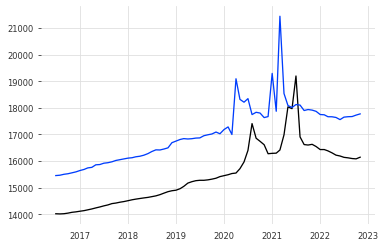

In [ ]:
plt.plot(rev_trans)
plt.plot(test_data)

## FinD

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
for i, dataset in enumerate(financial_datasets):
    if i % 5 == 0:
      error_df.to_pickle(f"FinD LSTM {i}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dataset = dataset.iloc[-1000:]
    test_size = 0.10
    win_length = 4
    num_features = 1
    epochs = 85

    Y_test_df = dataset.iloc[int(len(dataset)*(1-test_size)):]

    dataset = np.array(dataset).reshape(len(dataset), 1)
    scaler = StandardScaler()
    scaler.fit(dataset)
    scaled_data = scaler.transform(dataset)

    test_size_2 = (0.1*len(dataset) + win_length)/len(dataset)

    x_train, x_test, y_train, y_test = train_test_split(scaled_data, scaled_data,
                                                        test_size=test_size_2, shuffle=False)

    train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=32)
    test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=32)

    architectures = [[256, 128, 64, 32, 16]]

    for arch in architectures:
        model_lstm = Sequential()
        model_lstm.add(LSTM(arch[0], activation="relu", input_shape=(win_length, num_features), return_sequences=True))
        model_lstm.add(LSTM(arch[1], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[2], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[3], activation="relu", return_sequences=True))
        model_lstm.add(LSTM(arch[4], activation="relu", return_sequences=False))
        model_lstm.add(Dense(1))

        model_lstm.compile(optimizer="adam", loss="mse")
        #model_lstm.summary()

        model_lstm.fit(train_generator, epochs=epochs,
                         shuffle=False)

        pred_lstm = model_lstm.predict(test_generator, verbose=0)

        Y_hat_df = pd.DataFrame(scaler.inverse_transform(pred_lstm))
        Y_hat_df.set_index(Y_test_df.index, inplace=True)

        Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
        Y_NRMSE = NRMSE(Y_test, Y_hat)
        Y_RMSE = RMSE(Y_test, Y_hat)
        Y_MAE = MAE(Y_test, Y_hat)
        Y_MAPE = MAPE(Y_test, Y_hat)
        error_df_row = pd.DataFrame({"unique_id": i, "Dataset": list(ts_dict)[i], "Model": "LSTM", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[i])
        error_df = pd.concat([error_df, error_df_row])

# N-BEATS

In [ ]:
error_df.to_pickle("FinD LSTM full.pkl")

In [ ]:
! pip install darts

In [ ]:
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

#for id, dataset in enumerate(financial_datasets):
for id, dataset in zip(np.arange(10, len(financial_datasets)), financial_datasets[10:]):
    print(id)
    if id % 5 == 0:
      error_df.to_pickle(f"FinD N-Beats {id}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dataset = dataset.iloc[-1000:]
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 10
    out_length = 1
    num_features = 1
    epochs = 50

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    Y_train_df = TimeSeries.from_values(values=Y_train_df[0].values)
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df, fill_missing_dates=True, freq=ts_dict[list(ts_dict)[id]])
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df, freq="B")

    nbeats = NBEATSModel(
    input_chunk_length=win_length,
    output_chunk_length=out_length,
    generic_architecture=True,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

    nbeats.fit(
        series=Y_train_df,
        epochs=epochs,
    )

    scaled_pred_nbeats = nbeats.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_pred_nbeats.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": list(ts_dict)[id], "Model": "N-BEATS", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[id])
    error_df = pd.concat([error_df, error_df_row])

In [ ]:
error_df.to_pickle("FinD NBEATS 2 of 2.pkl")

In [ ]:
error_df.to_pickle("NBEATS FREDMD 122 126.pkl")

# CatBoost

In [ ]:
! pip install darts

In [ ]:
from darts.models.forecasting.catboost_model import CatBoostModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries
import numpy as np

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in enumerate(financial_datasets):
    if id % 1 == 0:
      error_df.to_pickle(f"FinD CatBoost {id}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 10
    out_length = 1
    num_features = 1
    epochs = 125

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    Y_train_df = TimeSeries.from_values(values=Y_train_df[0].values)
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df, fill_missing_dates=True, freq="MS")

    cat_model = CatBoostModel(
    lags=5,
    output_chunk_length=out_length,
    random_state=42,
    likelihood="gaussian"
    )

    cat_model.fit(
        series=Y_train_df,
        verbose=False
    )

    scaled_Y_hat = cat_model.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_Y_hat.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": list(ts_dict)[id], "Model": "CatBoost", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[id])
    error_df = pd.concat([error_df, error_df_row])

    # plt.style.use("default")
    # plt.plot(Y_hat_df)
    # plt.plot(Y_test_df)
    # plt.show()

In [ ]:
error_df.to_pickle("FinD CatBoost.pkl")

In [ ]:
error_df["Model"] = "

## Gridsearch

In [ ]:
import warnings
from queue import Queue
warnings.warn("ignore")
from threading import Thread
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

def grid_search(q, datasets):
  global grid_df
  grid_df = pd.DataFrame(columns=["Lags", "Output_Chunk", "NRMSE"])
  test_size = 0.1

  #while (q.empty() == False):
  i_dataset = q.get()

  dataset = datasets[i_dataset].copy()
  dataset.dropna(inplace=True)
  cutoff_i = np.random.randint(1, 20)
  LHS_cutoff_i = np.random.randint(1, cutoff_i)
  dataset = dataset.iloc[int((LHS_cutoff_i/100)*len(dataset)):-int(((cutoff_i-LHS_cutoff_i)/100)*len(dataset))]

  test_size_n = int(len(dataset)*test_size)
  train_size = int(len(dataset) - test_size_n)

  Y_test_df = dataset.iloc[train_size:]
  train_data = dataset.iloc[:train_size]

  train_data_array = np.array(train_data).reshape(int(len(train_data)), 1)
  scaler = StandardScaler()
  scaler.fit(train_data_array)
  scaled_data = scaler.transform(train_data_array)
  Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
  Y_train_df = TimeSeries.from_dataframe(Y_train_df)


  lags = np.arange(1,11)
  output_length = np.arange(1,11)
  grid = []

  for lag in lags:
    for length in output_length:
      grid.append((lag, length))

  print("GRID LENGTH:", len(grid))

  for i, params in enumerate(grid):
    if i % 25 == 0:
      print(i)
    cat_model = CatBoostModel(
    lags=int(params[0]),
    output_chunk_length=int(params[1]),
    random_state=42
    )

    cat_model.fit(
        series=Y_train_df,
        verbose=False
    )

    scaled_Y_hat = cat_model.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_Y_hat.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)

    grid_df_row = pd.DataFrame({"Lags": params[0], "Output_Chunk": params[1], "NRMSE": Y_NRMSE}, index=[i_dataset])
    grid_df = pd.concat([grid_df, grid_df_row])
    #print(f"Lags: {params[0]}, Output_chunk: {params[1]}, NRMSE: {Y_NRMSE}")

  q.task_done()

In [ ]:
q = Queue()
datasets_i = np.random.randint(0, 126, 5)

for index in datasets_i:
  q.put(index)

def grid(q, datasets):
  i = q.get()


num_threads = 5
threads = [Thread(target=grid_search, args=(q, datasets)) for i in range(num_threads)]
print(threads, "13")

[thread.start() for thread in threads]

q.join()

[<Thread(Thread-36, initial)>, <Thread(Thread-37, initial)>, <Thread(Thread-38, initial)>, <Thread(Thread-39, initial)>, <Thread(Thread-40, initial)>] 13
GRID LENGTH: 100
0
GRID LENGTH: 100
0
GRID LENGTH: 100
0
GRID LENGTH: 100
0
GRID LENGTH: 100
0


In [ ]:
grid_df.sort_values(by="NRMSE")

,Lags,Output_Chunk,NRMSE
117,3,1,0.018841
117,4,1,0.019232
117,3,3,0.022215
117,3,2,0.022329
117,4,2,0.022860
...,...,...,...
29,5,8,1.638797
29,4,10,1.774193
29,5,9,1.842028
29,4,9,1.888496


In [ ]:
grid_df.groupby("Lags").mean()

,NRMSE
Lags,
1,0.178771
2,0.166813
3,0.139402
4,0.241471
5,0.392581
6,0.677901


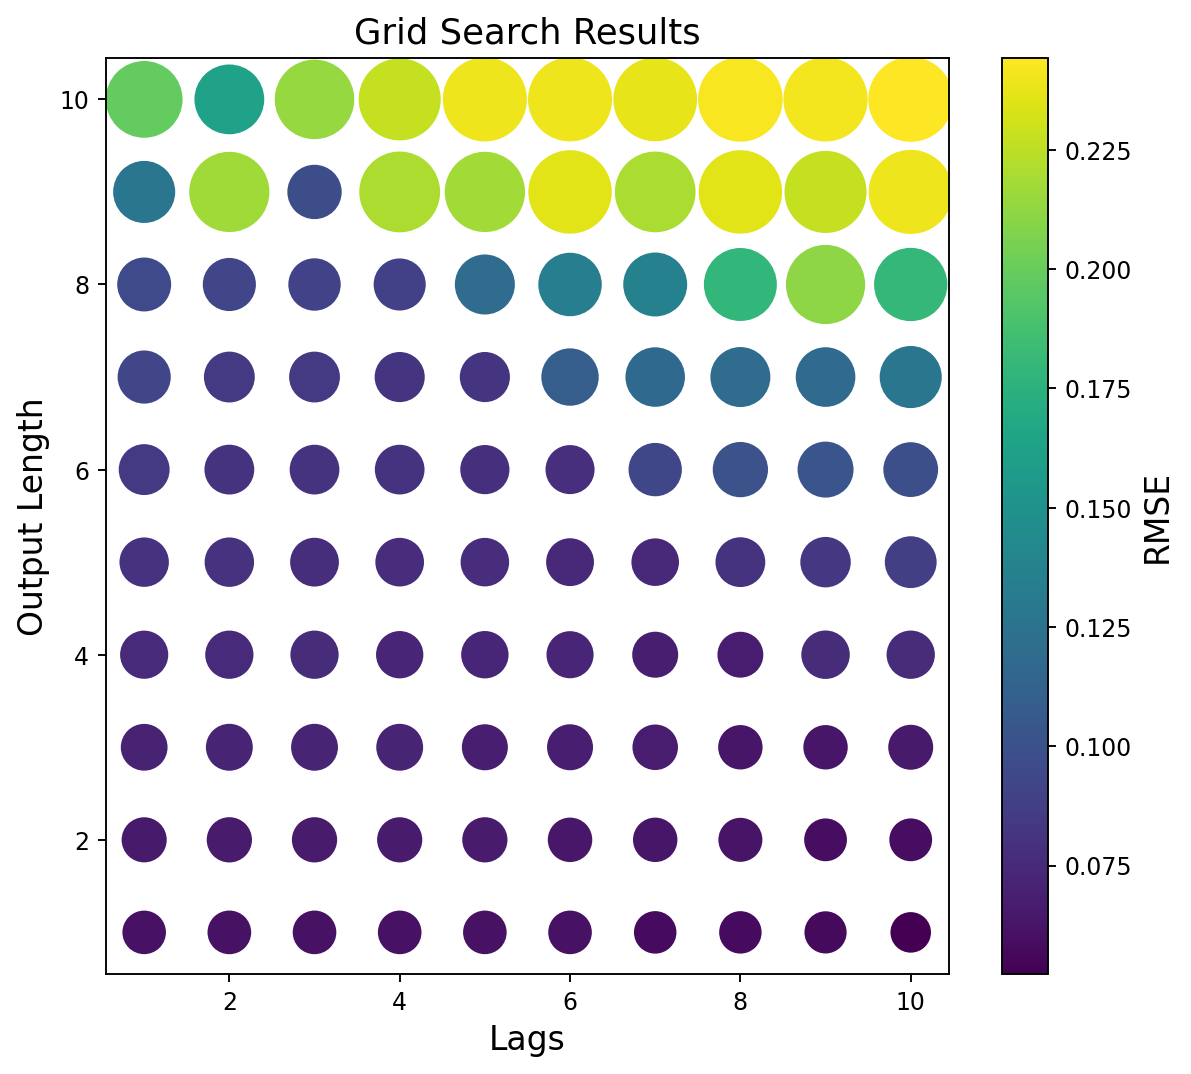

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")

# Generate some random data
x = grid_df.groupby["Lags"].to_numpy()
y = grid_df["Output_Chunk"].to_numpy()
rmse = grid_df["NRMSE"].to_numpy()

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8,7), dpi=170)
sc = ax.scatter(x, y, c=rmse, s=(5000*rmse), cmap='viridis')

# Add colorbar and adjust its properties
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('RMSE', fontsize=14)

# Set the labels for the x and y axis
ax.set_xlabel('Lags', fontsize=14)
ax.set_ylabel('Output Length', fontsize=14)

# Set the title for the plot
ax.set_title('Grid Search Results', fontsize=15)

plt.show()

In [ ]:
grid_df["Lags"].to_numpy(),

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7], dtype=object)

# D-Linear Model

In [ ]:
! pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4

In [ ]:
from darts.models.forecasting.dlinear import DLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in enumerate(financial_datasets):
    if id % 10 == 0:
      error_df.to_pickle(f"D-Liner {id}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 10
    out_length = 1
    num_features = 1
    epochs = 125

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    Y_train_df = TimeSeries.from_values(values=Y_train_df[0].values)
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df, fill_missing_dates=True, freq="MS")

    DLin_model = DLinearModel(
    input_chunk_length=win_length,
    output_chunk_length=out_length,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0],
        "auto_select_gpus": True
    }
    )

    DLin_model.fit(
        series=Y_train_df,
        epochs=epochs,
        verbose=False
    )

    scaled_Y_hat = DLin_model.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_Y_hat.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": get_key(dict_ids, id), "Model": "D-Linear", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
    error_df = pd.concat([error_df, error_df_row])

    plt.style.use("default")
    plt.plot(Y_hat_df)
    plt.plot(Y_test_df)
    plt.show()

In [ ]:
error_df["Dataset"] = list(ts_dict)
error_df.to_pickle("FinD DLinear full.pkl")

# Transformer Model

In [ ]:
! pip install darts

In [ ]:
from darts.models.forecasting.transformer_model import TransformerModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

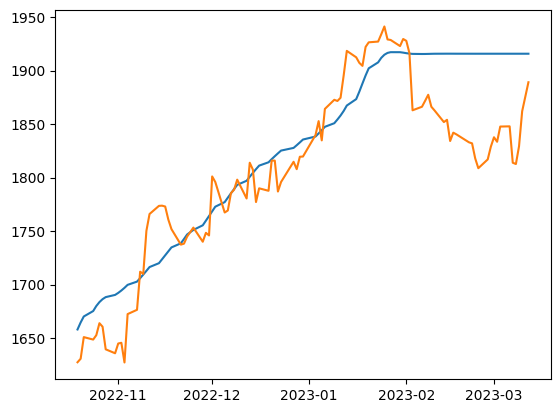

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

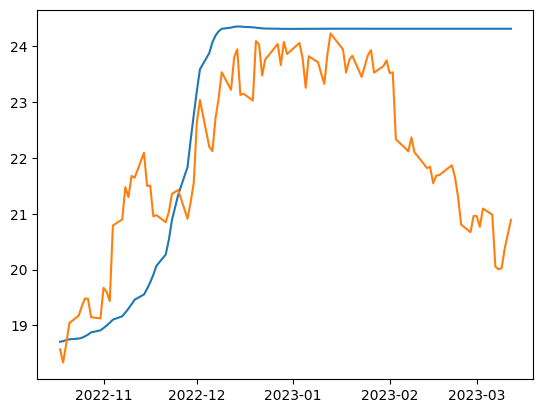

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

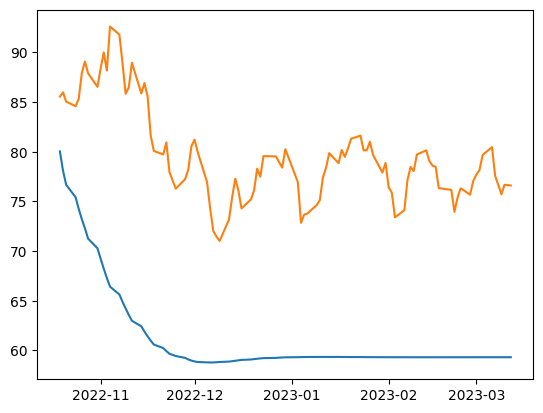

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

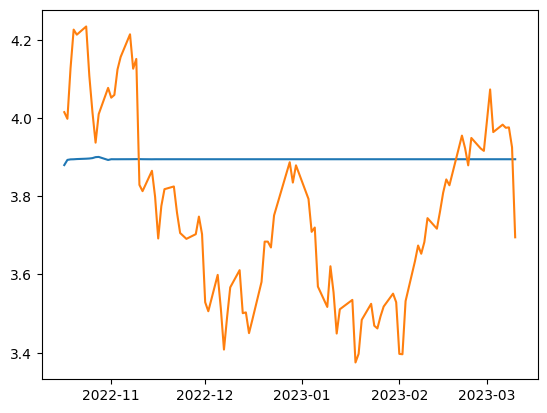

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

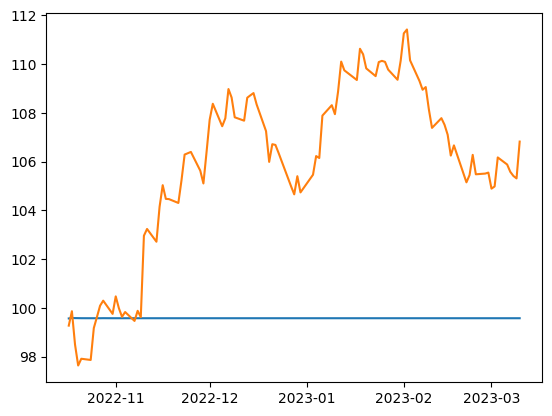

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=125` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

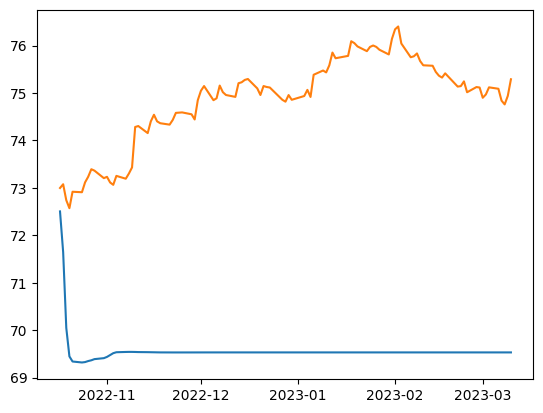

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

#for id, dataset in enumerate(datasets[41:]):
for id, dataset in enumerate(financial_datasets):
    if id % 20 == 0 or id == 126:
      error_df.to_pickle(f"Trans {id}.pkl")
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dataset = dataset.iloc[-1000:]
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 10
    out_length = 1
    num_features = 1
    epochs = 125

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df, fill_missing_dates=True, freq="MS")
    Y_train_df = TimeSeries.from_values(values=Y_train_df[0].values)

    transformer = TransformerModel(
    input_chunk_length=win_length,
    output_chunk_length=out_length,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

    transformer.fit(
        series=Y_train_df,
        epochs=epochs,
        verbose=False
    )

    scaled_Y_hat = transformer.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_Y_hat.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": list(ts_dict)[id], "Model": "Transformer", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[id])
    error_df = pd.concat([error_df, error_df_row])

    plt.style.use("default")
    plt.plot(Y_hat_df)
    plt.plot(Y_test_df)
    plt.show()

In [ ]:
error_df.to_pickle("FinD Transformer.pkl")

# N-HiTS

In [ ]:
! pip install darts

In [ ]:
from darts.models import NHiTSModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in enumerate(datasets[0:3]):
    dataset = dataset.copy()
    dataset.dropna(inplace=True)
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 10
    out_length = 1
    num_features = 1
    epochs = 200

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    Y_train_df = TimeSeries.from_dataframe(Y_train_df)

    nhits = NHiTSModel(
    input_chunk_length=win_length,
    output_chunk_length=out_length,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

    nhits.fit(
        series=Y_train_df,
        epochs=epochs,
    )

    scaled_pred_nhits = nhits.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_pred_nhits.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": get_key(dict_ids, id), "Model": "N-HiTS", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
    error_df = pd.concat([error_df, error_df_row])

,unique_id,Dataset,Model,NRMSE,RMSE,MAE,MAPE
0,0,RPI,N-HiTS,0.153291,2615.491836,2253.465268,12.789457
0,1,W875RX1,N-HiTS,0.224297,3114.089561,2821.320474,19.975159
0,2,DPCERA3M086SBEA,N-HiTS,0.055221,6.545338,5.011435,4.242575


(None, 0.14426967747845024)

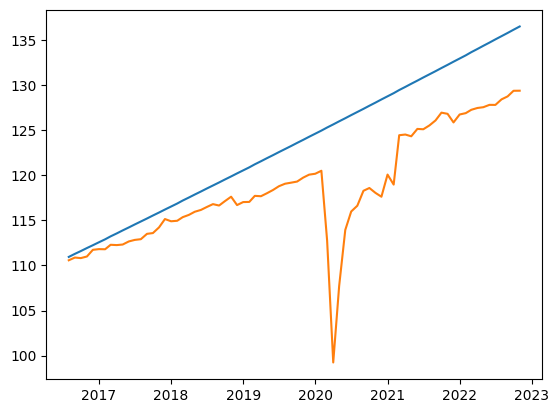

In [ ]:
plt.style.use("default")
plt.plot(Y_hat_df)
plt.plot(Y_test_df)
display(error_df), error_df["NRMSE"].mean()

# (T)BATS

In [ ]:
! pip install darts

In [ ]:
from darts.models.forecasting.tbats import TBATS, BATS
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from darts.timeseries import TimeSeries

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}
test_size = 0.1

for id, dataset in zip(np.arange(16, len(financial_datasets)), financial_datasets[16:]):
    print(id)
    if id % 5 == 0 or id == len(financial_datasets)-1:
      error_df.to_pickle(f"FinD TBATS {id}.pkl")
    dataset = dataset.copy()
    dataset = dataset.iloc[-1000:]
    dataset.dropna(inplace=True)
    dict_ids.update({str(dataset.columns[0]): id})

    win_length = 7
    out_length = 1
    num_features = 1
    epochs = 200

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    #Y_train_df = TimeSeries.from_dataframe(Y_train_df)
    Y_train_df = TimeSeries.from_values(values=Y_train_df[0].values)


    tbats = TBATS(
    random_state=42,
    )

    tbats.fit(
        Y_train_df
    )

    scaled_pred_tbats = tbats.predict(n=test_size_n)
    Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_pred_tbats.pd_dataframe()), index=Y_test_df.index)[0]

    Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": list(ts_dict)[id], "Model": "(T)BATS", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[id])
    error_df = pd.concat([error_df, error_df_row])

16


In [ ]:
error_df.to_pickle("FinD TBats exta.pkl")

# Prophet

In [ ]:
import prophet as ph
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
dict_ids = {}

for id, dataset in enumerate(financial_datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]
    test_size = 0.1
    test_index = int((1-test_size)*len(temp))
    dict_ids.update({str(temp.columns[0]): id})

    temp.reset_index(inplace=True)
    temp.rename(columns={temp.columns[0]: "ds", temp.columns[1]: "y"}, inplace=True)

    Y_train_df = temp.iloc[:test_index]
    Y_test_df = temp.iloc[test_index:]

    model = Prophet()
    model.fit(Y_train_df)
    #future = model.make_future_dataframe(periods=len(Y_test_df), freq="M")
    Y_hat_df = model.predict(Y_test_df)

    Y_test, Y_hat = Y_test_df["y"].to_numpy(), Y_hat_df["yhat"].to_numpy()
    Y_NRMSE = NRMSE(Y_test, Y_hat)
    Y_RMSE = RMSE(Y_test, Y_hat)
    Y_MAE = MAE(Y_test, Y_hat)
    Y_MAPE = MAPE(Y_test, Y_hat)
    error_df_row = pd.DataFrame({"unique_id": id, "Dataset": list(ts_dict)[id], "Model": "Prophet", "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[id])
    error_df = pd.concat([error_df, error_df_row])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4um7q0b/ocxcjogd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4um7q0b/kdn6vbxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52690', 'data', 'file=/tmp/tmpz4um7q0b/ocxcjogd.json', 'init=/tmp/tmpz4um7q0b/kdn6vbxx.json', 'output', 'file=/tmp/tmpz4um7q0b/prophet_model9dsoo6aw/prophet_model-20230313161506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz4u

In [ ]:
error_df.to_pickle("FinD Prophet.pkl")

In [ ]:
error_df

,unique_id,Dataset,Model,NRMSE,RMSE,MAE,MAPE
0,0,META,Prophet,0.740460,100.757413,74.625450,47.913148
1,1,KO,Prophet,0.044661,2.717326,2.344044,3.830853
2,2,NFLX,Prophet,0.223547,70.985981,68.348054,21.793899
3,3,^GSPC,Prophet,0.080781,318.863165,267.231222,6.674414
4,4,^FTSE,Prophet,0.042911,325.939990,275.848184,3.566688
5,5,^BSESN,Prophet,0.032157,1955.710613,1699.268389,2.798406
6,6,EURUSD=X,Prophet,0.009210,0.009759,0.008591,0.812783
7,7,JPY=X,Prophet,0.173265,23.553772,21.366623,16.008606
8,8,GBPEUR=X,Prophet,0.015947,0.018192,0.014952,1.314747
9,9,GBPCAD=X,Prophet,0.009126,0.014967,0.011435,0.694417


In [ ]:
plot_plotly(model, Y_hat_df)
#plot_components_plotly(model, Y_hat_df)

In [ ]:
plt.figure(figsize=(7,4), dpi=140)
plt.plot(Y_hat_df["ds"], Y_hat_df["yhat"])
plt.plot(Y_test_df["ds"], Y_test_df["y"])

# MLForecast

- Need to scale beforehand and see the results.


In [ ]:
! pip install mlforecast

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

## FREDMD

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

for i, dataset in enumerate(financial_datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]

    test_index = int(test_size*len(dataset))
    dict_ids.update({str(temp.columns[0]): i})
    temp["unique_id"] = i
    temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

    Y_test = temp.iloc[-test_index:]
    temp = temp.iloc[:-test_index]
    Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
    Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

Y_train_df["ds"] = Y_train_df.index
Y_train_df.set_index("unique_id", inplace=True, drop=True)

Y_test_df["ds"] = Y_test_df.index
Y_test_df.set_index("unique_id", inplace=True, drop=True)

In [ ]:
Y_train_df

,y,ds
unique_id,,
16,72.791718,2019-03-22
16,72.910522,2019-03-25
16,72.910522,2019-03-26
16,72.937950,2019-03-27
16,72.910522,2019-03-28
...,...,...
0,167.960007,2022-08-19
0,163.050003,2022-08-22
0,161.110001,2022-08-23


In [ ]:
models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
    BaggingRegressor(random_state=0),
    AdaBoostRegressor(random_state=0),
    HistGradientBoostingRegressor(),

    Lasso(),
    Ridge(),
    MLPRegressor(),
    SVR()
]


@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)

for i in range(len(financial_datasets)):
  Y_train_df_2 = Y_train_df.loc[Y_train_df["unique_id"] == i]
  fcst = MLForecast(
      models=models,
      freq=ts_dict[list(ts_dict)[i]],
      lags=[1, 2, 3, 4, 7, 14],
      lag_transforms={
          1: [expanding_mean],
          7: [rolling_mean_28]
      },
      date_features=['dayofweek'],
      differences=[1],
  )
  fcst.fit(Y_train_df_2, id_col='index', time_col='ds', target_col='y')
  Y_hat_df = fcst.predict(int(0.1*len(Y_train_df_2)))

SyntaxError: ignored

ValueError: ignored

In [ ]:
Y_hat_df

In [ ]:
Y_hat_df["ds"] = Y_test_df.sort_values(["unique_id", "ds"])["ds"]
Y_hat_df["true_value"] = Y_test_df.sort_values(["unique_id", "ds"])["y"].values
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])

for unique_id in range(len(datasets)):
    temp = Y_hat_df[Y_hat_df.index == unique_id]

    for model_index in range(1, len(temp.columns)-1):
      current_model = temp[temp.columns[model_index]]
      Y_NRMSE = NRMSE(temp["true_value"], current_model)
      Y_RMSE = RMSE(temp["true_value"], current_model)
      Y_MAE = MAE(temp["true_value"], current_model)
      Y_MAPE = MAPE(temp["true_value"], current_model)
      error_df_row = pd.DataFrame({"unique_id": unique_id, "Dataset": get_key(dict_ids, unique_id), "Model": temp.columns[model_index], "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
      error_df = pd.concat([error_df, error_df_row])

error_df.set_index("unique_id", inplace=True)

In [ ]:
error_df.to_pickle("MLforecast FREDMD 20 to 127.pkl")

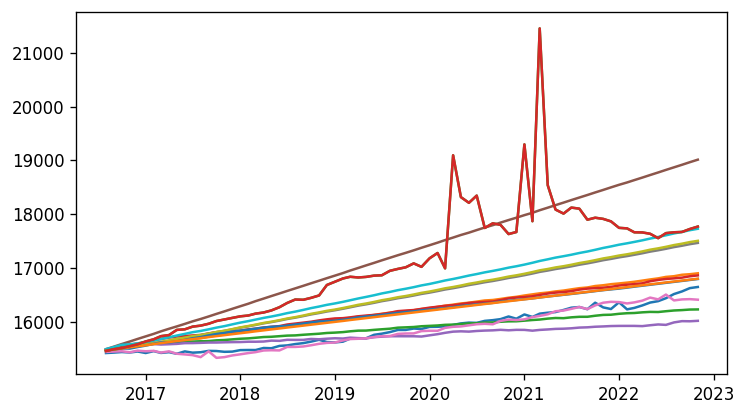

In [ ]:
plt.figure(figsize=(7,4), dpi=120)
plt.plot(Y_hat_df["ds"], Y_hat_df[Y_hat_df.columns[1:]])
plt.plot(Y_test_df["ds"], Y_test_df["y"])

## FinD

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

for i, dataset in enumerate(financial_datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]

    test_index = int(test_size*len(temp))
    dict_ids.update({str(temp.columns[0]): i})
    temp["unique_id"] = i
    temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

    Y_test = temp.iloc[-test_index:]
    temp = temp.iloc[:-test_index]
    Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
    Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

Y_train_df["ds"] = Y_train_df.index
Y_train_df.set_index("unique_id", inplace=True, drop=True)

Y_test_df["ds"] = Y_test_df.index
Y_test_df.set_index("unique_id", inplace=True, drop=True)

In [ ]:
models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
    BaggingRegressor(random_state=0),
    AdaBoostRegressor(random_state=0),
    HistGradientBoostingRegressor(),

    Lasso(),
    Ridge(),
    MLPRegressor(),
    SVR()
]


@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)

error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])

for i in range(len(financial_datasets)):
  Y_train_df_2 = Y_train_df.loc[Y_train_df.index == i]
  fcst = MLForecast(
      models=models,
      freq=ts_dict[list(ts_dict)[i]],
      lags=[1, 2, 3, 4, 7, 14],
      lag_transforms={
          1: [expanding_mean],
          7: [rolling_mean_28]
      },
      date_features=['dayofweek'],
      differences=[1],
  )
  fcst.fit(Y_train_df_2, id_col='index', time_col='ds', target_col='y')
  Y_hat_df = fcst.predict(100)
  Y_hat_df["ds"] = Y_test_df.loc[Y_test_df.index == i].sort_values(["unique_id", "ds"])["ds"]

  Y_hat_df["true_value"] = Y_test_df.loc[Y_test_df.index == i].sort_values(["unique_id", "ds"])["y"].values

  temp = Y_hat_df

  for model_index in range(1, len(temp.columns)-1):
    current_model = temp[temp.columns[model_index]]
    Y_NRMSE = NRMSE(temp["true_value"], current_model)
    Y_RMSE = RMSE(temp["true_value"], current_model)
    Y_MAE = MAE(temp["true_value"], current_model)
    Y_MAPE = MAPE(temp["true_value"], current_model)
    error_df_row = pd.DataFrame({"unique_id": i, "Dataset": list(ts_dict)[id], "Model": temp.columns[model_index], "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[i])
    error_df = pd.concat([error_df, error_df_row])
    print(error_df_row)

error_df.set_index("unique_id", inplace=True)

    unique_id Dataset          Model     NRMSE      RMSE       MAE       MAPE
14         14    VCSH  LGBMRegressor  0.672169  2.524693  2.225932  60.381032
    unique_id Dataset         Model     NRMSE      RMSE       MAE       MAPE
14         14    VCSH  XGBRegressor  0.408138  1.532982  1.359566  36.947978
    unique_id Dataset                  Model     NRMSE      RMSE       MAE  \
14         14    VCSH  RandomForestRegressor  0.150831  0.566529  0.509702   

         MAPE  
14  13.991183  
    unique_id Dataset             Model     NRMSE    RMSE       MAE       MAPE
14         14    VCSH  BaggingRegressor  0.310673  1.1669  1.044527  28.460738
    unique_id Dataset              Model    NRMSE      RMSE       MAE  \
14         14    VCSH  AdaBoostRegressor  0.24817  0.932137  0.835576   

         MAPE  
14  22.816802  
    unique_id Dataset                          Model     NRMSE      RMSE  \
14         14    VCSH  HistGradientBoostingRegressor  0.643019  2.415205   

         MA

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



    unique_id Dataset          Model     NRMSE       RMSE       MAE       MAPE
15         15    VCSH  LGBMRegressor  0.174944  18.502542  16.31984  15.206531
    unique_id Dataset         Model     NRMSE      RMSE       MAE      MAPE
15         15    VCSH  XGBRegressor  0.040458  4.278945  3.443755  3.209523
    unique_id Dataset                  Model     NRMSE      RMSE       MAE  \
15         15    VCSH  RandomForestRegressor  0.069732  7.375051  6.556173   

        MAPE  
15  6.098265  
    unique_id Dataset             Model     NRMSE      RMSE      MAE      MAPE
15         15    VCSH  BaggingRegressor  0.070796  7.487537  6.66062  6.195604
    unique_id Dataset              Model     NRMSE       RMSE      MAE  \
15         15    VCSH  AdaBoostRegressor  0.102964  10.889685  9.72624   

        MAPE  
15  9.056761  
    unique_id Dataset                          Model     NRMSE       RMSE  \
15         15    VCSH  HistGradientBoostingRegressor  0.110038  11.637895   

          M

In [ ]:
error_df.to_pickle("FinD MLForecast.pkl")

# Statsforecast

In [ ]:
! pip install statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, AutoCES, AutoTheta
from statsforecast.models import HistoricAverage, Naive, RandomWalkWithDrift, SeasonalNaive, WindowAverage, SeasonalWindowAverage
from statsforecast.models import HoltWinters

## FREDMD

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

error_df_agg = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
failed_ids = []

for i, dataset in enumerate(datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)

    test_index = int(test_size*len(dataset))
    dict_ids.update({str(temp.columns[0]): i})
    temp["unique_id"] = i
    temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

    Y_test = temp.iloc[-test_index:]
    temp = temp.iloc[:-test_index]
    Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
    Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

Y_train_df["ds"] = Y_train_df.index
Y_train_df.set_index("unique_id", inplace=True, drop=True)

Y_test_df["ds"] = Y_test_df.index
Y_test_df.set_index("unique_id", inplace=True, drop=True)

In [ ]:
# Define the appropriate models.
models = [
    #AutoARIMA(),
    #AutoETS(),
    AutoCES(),
    #AutoTheta(),

    #HoltWinters(),

    #HistoricAverage(),
    #Naive(),
    #RandomWalkWithDrift(),
    #SeasonalNaive(season_length=4),
    #WindowAverage(window_size=4),
    #SeasonalWindowAverage(season_length=12, window_size=4)
]

# Instantiate the StatsForecast class as sf.
sf = StatsForecast(
    df = Y_train_df,
    models = models,
    freq = "M",
    n_jobs = -1
)

horizon = test_index
# Forecast for the defined horizon.
Y_hat_df = sf.forecast(horizon)

Y_hat_df.rename(columns={"CES": "AutoCES"}, inplace=True)
Y_hat_df["ds"] = Y_test_df.sort_values(["unique_id", "ds"])["ds"]
Y_hat_df["true_value"] = Y_test_df.sort_values(["unique_id", "ds"])["y"].values

In [ ]:
error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])

for unique_id in range(len(datasets)):
    temp = Y_hat_df[Y_hat_df.index == unique_id]

    for model_index in range(1, len(temp.columns)-1):
      current_model = temp[temp.columns[model_index]]
      Y_NRMSE = NRMSE(temp["true_value"], current_model)
      Y_RMSE = RMSE(temp["true_value"], current_model)
      Y_MAE = MAE(temp["true_value"], current_model)
      Y_MAPE = MAPE(temp["true_value"], current_model)
      error_df_row = pd.DataFrame({"unique_id": unique_id, "Dataset": get_key(dict_ids, unique_id), "Model": temp.columns[model_index], "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE})
      error_df = pd.concat([error_df, error_df_row])

error_df.set_index("unique_id", inplace=True)

In [ ]:
error_df

,Dataset,Model,NRMSE,RMSE,MAE,MAPE
unique_id,,,,,,
0,RPI,AutoTheta,0.070156,1197.026411,915.325761,5.132555
1,W875RX1,AutoTheta,0.041388,574.627866,516.275596,3.656981
2,DPCERA3M086SBEA,AutoTheta,0.042027,4.981487,3.825762,3.172347
3,CMRMTSPLx,AutoTheta,0.031807,47512.743830,37400.516447,2.520824
4,RETAILx,AutoTheta,0.160524,87275.832084,63482.357730,10.548138
...,...,...,...,...,...,...
122,UMCSENTx,AutoTheta,0.177517,15.209224,11.871745,16.538723
123,DTCOLNVHFNM,AutoTheta,0.072174,23788.278733,15940.984441,4.456957
124,DTCTHFNM,AutoTheta,0.061920,45401.698907,39989.933684,5.460334


In [ ]:
error_df.to_pickle("StatsForecast FREDMD AutoTheta.pkl")

## FinD

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

for i, dataset in enumerate(financial_datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)
    temp = temp.iloc[-1000:]

    test_index = int(test_size*len(temp))
    dict_ids.update({str(temp.columns[0]): i})
    temp["unique_id"] = i
    temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

    Y_test = temp.iloc[-test_index:]
    temp = temp.iloc[:-test_index]
    Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
    Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

Y_train_df["ds"] = Y_train_df.index
Y_train_df.set_index("unique_id", inplace=True, drop=True)

Y_test_df["ds"] = Y_test_df.index
Y_test_df.set_index("unique_id", inplace=True, drop=True)

In [ ]:
# Define the appropriate models.
models = [
    AutoARIMA(),
    AutoTheta(),

    HistoricAverage(),
    Naive(),
    RandomWalkWithDrift(),
    SeasonalNaive(season_length=4),
    WindowAverage(window_size=4),
    SeasonalWindowAverage(season_length=12, window_size=4)
]

error_df = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])

for i in range(len(financial_datasets)):
  Y_train_df_2 = Y_train_df.loc[Y_train_df.index == i]

  sf = StatsForecast(
      df = Y_train_df_2,
      models = models,
      freq = ts_dict[list(ts_dict)[i]],
      n_jobs = -1
  )

  horizon = test_index

  # Forecast for the defined horizon.
  Y_hat_df = sf.forecast(horizon)

  Y_hat_df["ds"] = Y_test_df.loc[Y_test_df.index == i].sort_values(["unique_id", "ds"])["ds"]

  Y_hat_df["true_value"] = Y_test_df.loc[Y_test_df.index == i].sort_values(["unique_id", "ds"])["y"].values

  temp = Y_hat_df

  for model_index in range(1, len(temp.columns)-1):
    current_model = temp[temp.columns[model_index]]
    Y_NRMSE = NRMSE(temp["true_value"], current_model)
    Y_RMSE = RMSE(temp["true_value"], current_model)
    Y_MAE = MAE(temp["true_value"], current_model)
    Y_MAPE = MAPE(temp["true_value"], current_model)
    error_df_row = pd.DataFrame({"unique_id": i, "Dataset": list(ts_dict)[i], "Model": temp.columns[model_index], "NRMSE": Y_NRMSE, "RMSE": Y_RMSE, "MAE": Y_MAE, "MAPE": Y_MAPE}, index=[i])
    error_df = pd.concat([error_df, error_df_row])
    print(error_df_row)

error_df.set_index("unique_id", inplace=True)

   unique_id Dataset      Model     NRMSE       RMSE        MAE      MAPE
0          0    META  AutoARIMA  0.454832  61.890854  46.570302  30.32387
   unique_id Dataset      Model     NRMSE       RMSE        MAE       MAPE
0          0    META  AutoTheta  0.220961  30.067095  23.385668  16.296783
   unique_id Dataset            Model     NRMSE        RMSE         MAE  \
0          0    META  HistoricAverage  0.796253  108.349291  104.492513   

        MAPE  
0  84.479749  
   unique_id Dataset  Model     NRMSE       RMSE        MAE       MAPE
0          0    META  Naive  0.221401  30.126966  23.400999  16.283762
   unique_id Dataset Model     NRMSE       RMSE        MAE       MAPE
0          0    META   RWD  0.233716  31.802661  24.305324  16.689411
   unique_id Dataset          Model     NRMSE       RMSE        MAE       MAPE
0          0    META  SeasonalNaive  0.218347  29.711402  23.328299  16.425212
   unique_id Dataset          Model     NRMSE       RMSE      MAE       MAPE
0   

In [ ]:
error_df.to_pickle("FinD StatsForecast.pkl")

## Error Catching

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

error_df_agg = pd.DataFrame(columns=["unique_id", "Dataset", "Model", "NRMSE", "RMSE", "MAE", "MAPE"])
failed_ids = []
for i in range(len(datasets)):
  try:
    for i, dataset in enumerate(datasets[i:i+1]):
        temp = dataset.copy()
        temp.dropna(inplace=True)
        print(temp.columns[0])

        test_index = int(test_size*len(dataset))
        dict_ids.update({str(temp.columns[0]): i})
        temp["unique_id"] = i
        temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

        Y_test = temp.iloc[-test_index:]
        temp = temp.iloc[:-test_index]
        Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
        Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

    Y_train_df["ds"] = Y_train_df.index
    Y_train_df.set_index("unique_id", inplace=True, drop=True)

    Y_test_df["ds"] = Y_test_df.index
    Y_test_df.set_index("unique_id", inplace=True, drop=True)

## Plotting

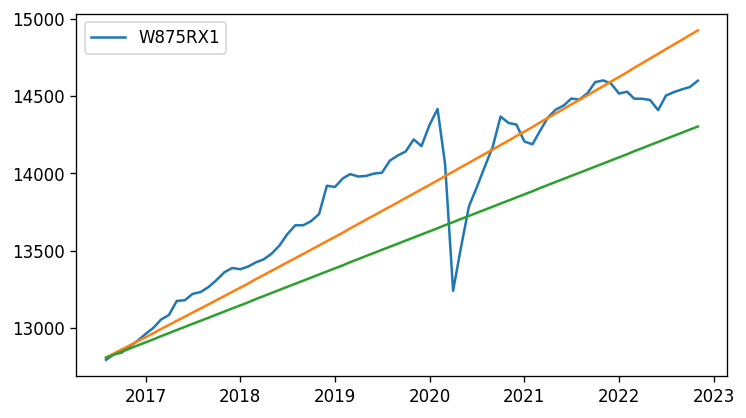

In [ ]:
index = 1
plt.figure(figsize=(7,4), dpi=120)
temp = Y_hat_df[Y_hat_df.index == index]
plt.plot(temp["ds"], temp["true_value"], label=(get_key(dict_ids, index)[0]))
plt.plot(temp["ds"], temp[["CES", "AutoETS"]])
plt.legend()
plt.show()

# Analysis of Data

In [ ]:
import pandas as pd
# FREDMD
fred_lstm = pd.read_pickle("FREDMD LSTM x.pkl")
fred_grey = pd.read_pickle("FREDMD-Greykite Final.pkl")
fred_nbeats = pd.read_pickle("FRED NBEATS x.pkl")
fred_cat = pd.read_pickle("FREDMD CatBoost x.pkl")
fred_dlin = pd.read_pickle("D-LINEAR FREDMD full.pkl")
fred_trans = pd.read_pickle("FREDMD Trans x.pkl")
fred_tbats = pd.read_pickle("FREDMD Tbats x.pkl")
fred_proph = pd.read_pickle("Prophet FREDMD 126.pkl")
fred_mlfor = pd.read_pickle("FRED MLfor x.pkl")
fred_stats = pd.read_pickle("FREDMD StatsFor x.pkl")
fred_total = pd.concat([fred_lstm, fred_grey, fred_nbeats, fred_cat, fred_dlin, fred_trans, fred_tbats, fred_proph, fred_mlfor, fred_stats])
fred_total.to_pickle("FREDMD Total x.pkl")

# FinD
find_lstm = pd.read_pickle("FinD LSTM full.pkl")
find_nbeats = pd.read_pickle("FinD N-Beats 10.pkl")
find_dlin = pd.read_pickle("FinD DLinear full.pkl")
find_nbeats = pd.read_pickle("FinD NBEATS x.pkl")
find_trans = pd.read_pickle("FinD Transformer.pkl")
find_cat = pd.read_pickle("FinD CatBoost.pkl")
find_tbats = pd.read_pickle("FinD TBATS 16.pkl")
find_proph = pd.read_pickle("FinD Prophet.pkl")
find_mlfor = pd.read_pickle("FinD MLForecast.pkl")
find_stats = pd.read_pickle("FinD StatsForecast.pkl")
temp = pd.read_pickle("FinD TBats exta.pkl")
find_total = pd.concat([find_lstm, find_nbeats, find_cat, find_dlin, find_trans, find_tbats, find_proph, find_mlfor, find_stats, temp])
find_total.to_pickle("FinD Total x.pkl")

In [ ]:
find_tbats

,unique_id,Dataset,Model,NRMSE,RMSE,MAE,MAPE
0,0,META,(T)BATS,0.217245,29.590074,24.293370,17.546682
1,1,KO,(T)BATS,0.097487,5.931419,5.580680,9.070587
2,2,NFLX,(T)BATS,0.100804,32.009693,29.450850,9.445919
3,3,^GSPC,(T)BATS,0.077244,304.902745,282.703552,7.083609
4,4,^FTSE,(T)BATS,0.095700,726.902777,670.460153,8.699978
5,5,^BSESN,(T)BATS,0.035267,2144.817567,1876.348674,3.056590
6,6,EURUSD=X,(T)BATS,0.009100,0.009642,0.008368,0.791947
7,7,JPY=X,(T)BATS,0.150854,20.507218,18.621935,13.956982
8,8,GBPEUR=X,(T)BATS,0.014818,0.016904,0.014854,1.308589
9,9,GBPCAD=X,(T)BATS,0.007335,0.012030,0.008740,0.530347


# Additional Testing

### Feature Extraction

In [ ]:
FREDMD_copy = FREDMD.copy()
FREDMD_copy.reset_index(inplace=True)
FREDMD_copy.rename(columns={"sasdate": "time"}, inplace=True)
FREDMD_copy["time"] = pd.to_datetime(FREDMD_copy["time"], unit="D", infer_datetime_format=True)

ts_ob = TimeSeriesData(FREDMD_copy.dropna())

feature_extraction = TsFeatures()

output_ts = feature_extraction.transform(ts_ob["RPI"])

dataset = datasets[0]
dataset.dropna(inplace=True)
dataset = dataset.reset_index()
dataset.rename(columns={"sasdate": "ds", "W875RX1": "y"}, inplace=True)
dataset["unique_id"] = "D1"
dataset.set_index("unique_id", inplace=True)
tsfeatures(dataset, freq="M")

## Old Code

In [ ]:
test_size = 0.1
Y_train_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
Y_test_df = pd.DataFrame(columns=["unique_id", "ds", "y"])
dict_ids = {}

for i, dataset in enumerate(datasets):
    temp = dataset.copy()
    temp.dropna(inplace=True)

    test_index = int(test_size*len(dataset))
    dict_ids.update({str(temp.columns[0]): i})
    temp["unique_id"] = i
    temp.rename(columns={temp.columns[0]: "y"}, inplace=True)

    Y_test = temp.iloc[-test_index:]
    temp = temp.iloc[:-test_index]
    Y_train_df = pd.concat([temp, Y_train_df], join="inner", axis=0)
    Y_test_df = pd.concat([Y_test, Y_test_df], join="outer", axis=0)

Y_train_df["ds"] = Y_train_df.index
Y_train_df.set_index("unique_id", inplace=True, drop=True)

Y_test_df["ds"] = Y_test_df.index
Y_test_df.set_index("unique_id", inplace=True, drop=True)

In [ ]:
import warnings
from queue import Queue
warnings.warn("ignore")

def grid_search(q):
  grid_df = pd.DataFrame(columns=["Lags", "Output_Chunk", "NRMSE"])
  test_size = 0.1


  for val, i in enumerate(datasets_i):
    print(val)
    dataset = datasets[i].copy()
    dataset.dropna(inplace=True)
    cutoff_i = np.random.randint(1, 20, 1)
    LHS_cutoff_i = np.random.randint(1, cutoff_i[0], 1)
    dataset = dataset.iloc[int(LHS_cutoff_i[0]/100*len(dataset)):-int((cutoff_i[0]-LHS_cutoff_i[0])/100*len(dataset))]

    test_size_n = int(len(dataset)*test_size)
    train_size = len(dataset) - test_size_n

    Y_test_df = dataset.iloc[train_size:]
    train_data = dataset.iloc[:train_size]

    train_data_array = np.array(train_data).reshape(len(train_data), 1)
    scaler = StandardScaler()
    scaler.fit(train_data_array)
    scaled_data = scaler.transform(train_data_array)
    Y_train_df = pd.DataFrame(scaled_data, index=train_data.index)
    Y_train_df = TimeSeries.from_dataframe(Y_train_df)

    while (q.empty == False):

    params = q.get()

    for i, params in enumerate(grid):
      print(i)
      cat_model = CatBoostModel(
      lags=int(params[0]),
      output_chunk_length=int(params[1]),
      random_state=42
      )

      cat_model.fit(
          series=Y_train_df,
          verbose=False
      )

      scaled_Y_hat = cat_model.predict(n=test_size_n)
      Y_hat_df = pd.DataFrame(scaler.inverse_transform(scaled_Y_hat.pd_dataframe()), index=Y_test_df.index)[0]

      Y_test, Y_hat = Y_test_df.to_numpy(), Y_hat_df.to_numpy().reshape(len(Y_hat_df), 1)
      Y_NRMSE = NRMSE(Y_test, Y_hat)

      grid_df_row = pd.DataFrame({"Lags": params[0], "Output_Chunk": params[1], "NRMSE": Y_NRMSE}, index=[1])
      grid_df = pd.concat([grid_df, grid_df_row])
      #print(f"Lags: {params[0]}, Output_chunk: {params[1]}, NRMSE: {Y_NRMSE}")

  return grid_df.reset_index(drop=True)
